# chapter 07 | 군집화

## 01. K-평균 알고리즘 이해
#### 작동 방식
1. 군집 중심(centroid)라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 데이터 포인트들을 선택
2. 선택된 데이터 포인트의 평균 지점으로 이동하고, 이동된 점에서 다시 가까운 데이터 포인트들을 선택, 다시 중심점을 평균 지점으로 이동하는 과정을 반복
3. 더 이상 중심점의 이동이 없을 경우에 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화
![k-means](https://user-images.githubusercontent.com/38090151/130308996-d3af82a1-f07b-4969-a49e-3c411a2eb876.png)

#### 장점
- 군집화(clustering)에서 가장 일반적으로 사용되는 알고리즘
- 알고리즘이 쉽고 간결

#### 단점
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐 (PCA 차원 축소 적용)
- 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
- 몇 개의 군집(cluster)을 선택할지 가이드하기가 어려움

### 사이킷런 KMeans 클래스 소개

```
class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
```
#### 인자
- `n_cluster` : 군집 혹은 군집 중심점의 개수
- `init` : 군집 중심점 최초로 설정할 방식, 일반적으로 'k-mean++'
- `max_iter` : 최대 반복 횟수, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료

### 속성
- `labels_` : 각 데이터 포인트가 속한 군집 중심점 레이블
- `cluster_centers_` : 최종 군집 중심점의 좌표

#### iris 데이터 셋

In [86]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = ['sepal_length', 'sepal_width','petal_length','petal_width'])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(iris_df)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [7]:
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_

iris_result = iris_df.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_trans = pca.fit_transform(iris.data)

iris_df['pca_x'] = pca_trans[:,0]
iris_df['pca_y'] = pca_trans[:,1]

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


Text(0.5, 1.0, '3 Clusters Visualization by 2 PCA Components')

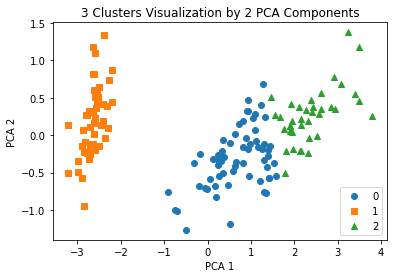

In [26]:
# cluster
markers = ['o','s','^']

plt.figure()
for i, mark in enumerate(markers):
    pca_x = iris_df[iris_df['cluster']==i]['pca_x']
    pca_y = iris_df[iris_df['cluster']==i]['pca_y']
    
    plt.scatter(pca_x, pca_y, marker=mark, label=i)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
# plt.grid()
plt.legend()
plt.title('3 Clusters Visualization by 2 PCA Components')

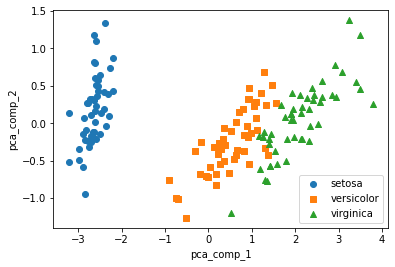

In [24]:
# target

def get_pca_plot(iris_pca_df) :
    markers = ['o','s','^']
    
    plt.figure()
    for i, mark in enumerate(markers):
        x_data = iris_pca_df[iris_pca_df['target']==i]['pca_x']
        y_data = iris_pca_df[iris_pca_df['target']==i]['pca_y']
        plt.scatter(x_data, y_data, marker=mark, label=iris.target_names[i])

    plt.xlabel('pca_comp_1')
    plt.ylabel('pca_comp_2')
#     plt.grid()
    plt.legend()
    
get_pca_plot(iris_df)

### 군집화 알고리즘 테스트를 위한 데이터 생성
1. __make_blobs()__ : 개별 군집의 중심점과 표준 편차 제어 기능 추가
```
sklearn.datasets.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=- 10.0, 10.0, shuffle=True, random_state=None, return_centers=False)
```
- `n_samples` : 샘플의 개수
- `n_features` : 데이터 피처의 개수, 시각화 목표를 위해서는 2개로
- `centers` : 군집/클래스의 개수
- `cluster_std` : 군집 데이터의 표준 편차
2. __make_classification()__ : 노이즈를 포함한 데이터
3. __make_circle(), make_moon()__ : 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는데 사용

In [27]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=200, n_features=2, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

uni, cnts = np.unique(y, return_counts=True)
print(uni, cnts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [28]:
cluster_df = pd.DataFrame(X, columns=['ftr1','ftr2'])
cluster_df['target'] = y
cluster_df.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


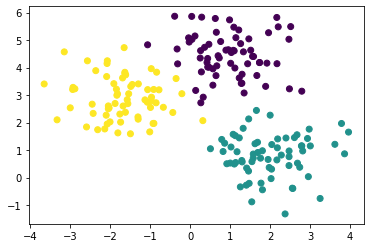

In [29]:
plt.scatter(cluster_df.ftr1, cluster_df.ftr2, c=cluster_df.target)

In [43]:
cluster_df.head(3)

,ftr1,ftr2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0


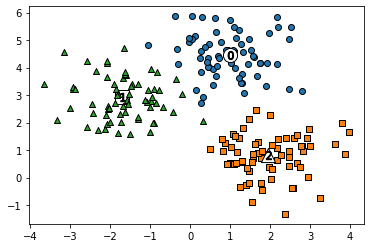

In [53]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(X)
cluster_df['kmeans_label'] = kmeans.labels_ # attribute
# cluster_df['kmeans_label'] = kmeans.fit_predict(X) # method

centers = kmeans.cluster_centers_
# uni_labels, cnts = np.unique(kmeans.labels_, return_counts=True)

markers = ['o','s','^']
plt.figure()
for i, mark in enumerate(markers) :
    x = cluster_df[cluster_df['target']==i]['ftr1']
    y = cluster_df[cluster_df['target']==i]['ftr2']
    
    plt.scatter(x,y, marker=mark, edgecolor='k')
    plt.scatter(centers[i,0], centers[i,1], marker=mark, s=200, color='white', edgecolor='k')
    plt.scatter(centers[i,0], centers[i,1], marker='$%d$'%i, s=70, color='k')

In [58]:
# cluster_df.groupby('target')['kmeans_label'].value_counts()
cluster_df.groupby(['target','kmeans_label'])['ftr1'].count()

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: ftr1, dtype: int64

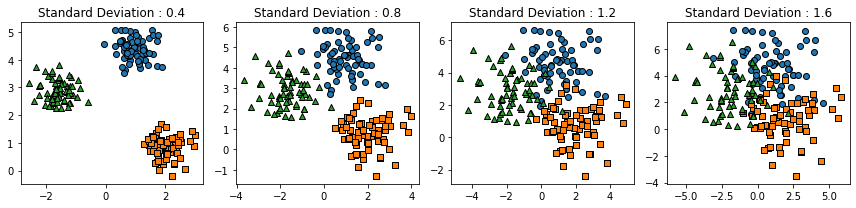

In [93]:

def get_cluster_plot(X, Y, std):
    
    cluster_df = pd.DataFrame(X, columns=['ftr1','ftr2'])
    cluster_df['target'] = Y
    
    kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(X)
    cluster_df['kmeans_label'] = kmeans.labels_ # attribute
    # cluster_df['kmeans_label'] = kmeans.fit_predict(X) # method
    
    markers = ['o','s','^']
    for i, mark in enumerate(markers) :
        x = cluster_df[cluster_df['target']==i]['ftr1']
        y = cluster_df[cluster_df['target']==i]['ftr2']

        plt.scatter(x,y, marker=mark, edgecolor='k')
    plt.title(f"Standard Deviation : {std}")

stds = [0.4, 0.8, 1.2, 1.6]

plt.figure(figsize=(12,3))
for idx, std in enumerate(stds) :
    X, Y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=std, random_state=0)
    plt.subplot("14"+str(idx+1))
    get_cluster_plot(X, Y, std)

plt.tight_layout()

2021.08.22 update
>  k-평균은 평균 거리 중심으로 이동하면서 군집화를 수행하기 때문에 <U>개별 군집 내의 데이터가 원형으로 흩어져 있는 경우</U>에 효과적 - pp.437